In [1]:
%pylab inline
import seaborn
import os
import numpy as np
from scipy import stats
import matplotlib.pylab as plt
from scipy.optimize import curve_fit
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [2]:
file_loc = r'/Users/fanchang/Desktop/A50/LiteOn_module'
file_name = r'P1_13pc_liteon.csv'
df_module = pd.read_csv(os.path.join(file_loc, file_name))
df_module.head(5)

,SeqNO,CT,LB,LT,RT,RB,CornerDiff,Loc
0,LOE65001063010A6BP0022BAI06BF12000,0.806094,0.622383,0.524463,0.511161,0.662095,15.395820,Center
1,LOE65001063010A6BP000FEAI06BF12000,0.789305,0.622370,0.616376,0.688213,0.699849,13.408290,Center
2,LOE65001063010A6BP002CFAI06BF12000,0.745218,0.616164,0.625213,0.618304,0.603441,13.713090,Center
3,LOE65001063010A6BP0027AAI06BF12000,0.760705,0.587206,0.602691,0.684595,0.689652,10.593440,Center
4,LOE65001063010A6BP001DDAI06BF12000,0.684967,0.691632,0.692526,0.664549,0.715759,5.120934,Center


In [3]:
file_loc = r'/Users/fanchang/Desktop/A50/IQC_correlation'
file_name = r'13pcs_tracking_focus_iq_off.csv'
df_IQC = pd.read_csv(os.path.join(file_loc, file_name))
df_IQC.head(5)

,SN,Time,Test_Time,Result,Max_Y,V_MTF50P_C,V_MTF50P_UL,V_MTF50P_LL,V_MTF50P_UR,V_MTF50P_LR,...,H_SFR@0.125C/P_UL,H_SFR@0.125C/P_LL,H_SFR@0.125C/P_UR,H_SFR@0.125C/P_LR,X_Shift,Y_Shift,Rotation,FOV-D,FOV-H,FOV-V
0,LOE65001063010A6BP003E6AI06BF12000,#20161224171803,8.69,1,220.90,0.1323,0.0973,0.1067,0.1188,0.1250,...,0.4600,0.2391,0.5446,0.3109,-0.2,-22.0,179.816,80.34,72.64,44.90
1,LOE65001063010A6BP001D1AI06BF12000,#20161224171845,8.43,1,183.12,0.1301,0.0915,0.1221,0.1631,0.1968,...,0.3416,0.3579,0.4880,0.4893,-13.4,10.0,179.777,80.62,72.55,44.75
2,LOE65001063010A6BP002E6AI06BF12000,#20161224171928,8.30,1,181.06,0.1986,0.1178,0.1170,0.1844,0.1900,...,0.4168,0.4555,0.6140,0.6172,-9.2,-7.0,179.840,80.24,72.46,44.73
3,LOE65001063010A6BP00378AI06BF12000,#20161224172010,8.31,1,187.32,0.2062,0.1097,0.1063,0.1809,0.1836,...,0.4457,0.4355,0.5374,0.5595,-0.6,0.5,179.868,80.39,72.56,44.74
4,LOE65001063010A6BP00029AI06BF12000,#20161224172057,8.47,1,219.21,0.1934,0.1692,0.1780,0.1007,0.0965,...,0.5561,0.5380,0.4876,0.4160,-4.7,-18.0,179.996,79.73,72.21,44.67


In [4]:
df_module_IQC = df_module.merge(df_IQC, left_on='SeqNO', right_on='SN', how='inner')

In [13]:
x = np.array(df_module_IQC['CT'])
y = np.array(df_module_IQC['V_SFR@0.125C/P_C'])
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
p = np.poly1d([slope,intercept])
print "R-squared:", r_value**2
#print p
print "MSE:", std_err

R-squared: 0.850851608483
MSE: 0.139435384433


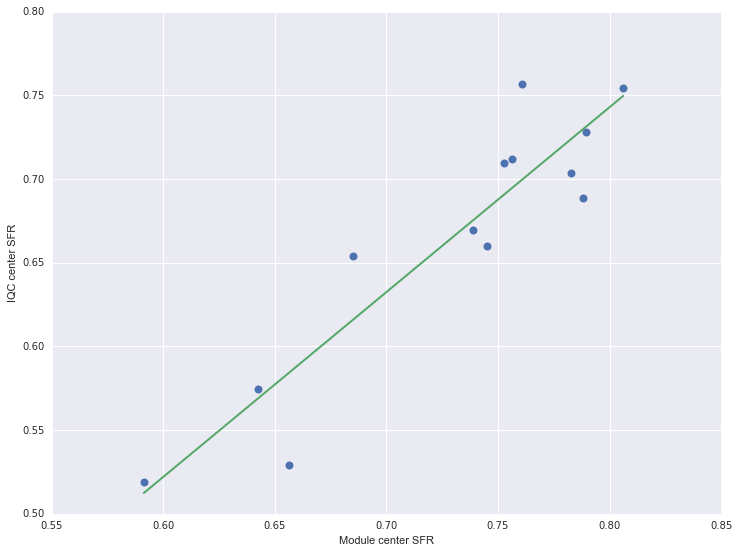

In [35]:
plt.figure(figsize=[12,9])
plt.plot(df_module_IQC['CT'],df_module_IQC['V_SFR@0.125C/P_C'],'o',markersize=8)
plt.plot(np.sort(df_module_IQC['CT']),p(np.sort(df_module_IQC['CT'])),'-',lw=2)
plt.grid(True)
plt.xlabel('Module center SFR')
plt.ylabel('IQC center SFR')

In [15]:
np.sqrt(sum((p(np.sort(df_module_IQC['CT']))-df_module_IQC['V_SFR@0.125C/P_C'])**2)/12)

0.13256351686138487

(array([ 2.,  0.,  1.,  0.,  0.,  2.,  1.,  2.,  3.,  2.]),
 array([ 0.5188 ,  0.54257,  0.56634,  0.59011,  0.61388,  0.63765,
         0.66142,  0.68519,  0.70896,  0.73273,  0.7565 ]),
 <a list of 10 Patch objects>)

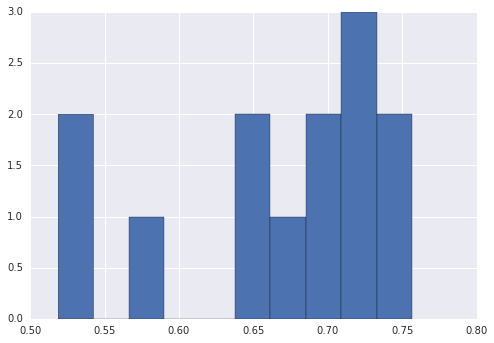

In [32]:
plt.hist(df_module_IQC['V_SFR@0.125C/P_C'])

In [18]:
cam_fatp = pd.read_csv(r'/Users/fanchang/Downloads/report_0109day/report_0109day/check_focus_pass_20170109.csv')
cam_fatp.head(5)

,SN,FFSID,Time,Test_Time,IQ,Result,Center_Y,V_MTF50P_C,V_MTF50P_UL,V_MTF50P_LL,...,H_SFR@0.25C/P_LL,H_SFR@0.25C/P_UR,H_SFR@0.25C/P_LR,X_Shift,Y_Shift,Rotation,FOV-D,FOV-H,FOV-V,LED
0,#LOE65001063010A6BP001E1AI06BF12000,#716G0004T,#20170109094211,19.17,0,1,132.29,0.3949,0.3520,0.3455,...,1.1010,1.1830,0.9910,-9.2,11.5,179.553,76.47,68.66,41.84,0
1,#LOE65001063010A6BP001E1AI06BF12000,#716G0004T,#20170109101445,18.82,0,1,132.02,0.4206,0.3566,0.3502,...,0.9932,1.1020,0.9726,-9.3,10.5,179.547,76.48,68.69,41.86,0
2,#LOE65001063010A6BP001E1AI06BF12000,#716G0004T,#20170109101613,18.77,0,1,131.27,0.4124,0.3686,0.3546,...,0.9697,1.2590,0.9626,-9.3,10.5,179.547,76.49,68.69,41.85,0
3,#LOE65001063010A6BP00381AI06BF12000,#716G0004P,#20170109102752,19.14,0,1,117.99,0.5009,0.3579,0.3480,...,0.9240,0.6899,0.7792,14.7,16.0,179.590,76.07,68.24,41.57,0
4,#LOE65001063010A6BP00306AI06BF12000,#716G0004E,#20170109103933,19.25,0,1,123.67,0.3950,0.3715,0.3547,...,1.1800,1.1420,0.9540,-1.5,17.0,179.442,75.83,68.12,41.57,0


([array([  0.,   0.,   1.,   0.,   3.,   5.,  11.,  38.,  30.,  14.]),
  array([  2.,   1.,   0.,   3.,   5.,  11.,  39.,  31.,  10.,   0.])],
 array([ 1.04  ,  1.0804,  1.1208,  1.1612,  1.2016,  1.242 ,  1.2824,
         1.3228,  1.3632,  1.4036,  1.444 ]),
 <a list of 2 Lists of Patches objects>)

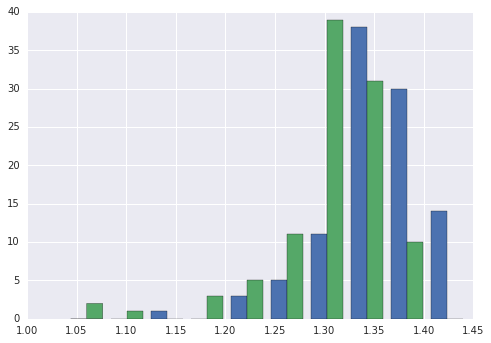

In [33]:
plt.hist([cam_fatp['V_SFR@0.125C/P_C'],cam_fatp['H_SFR@0.125C/P_C']])

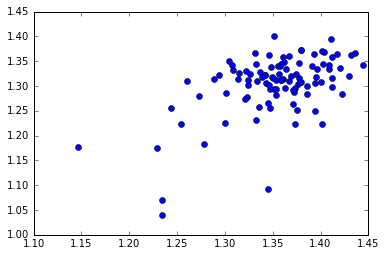

In [21]:
plt.plot(cam_fatp['V_SFR@0.125C/P_C'],cam_fatp['H_SFR@0.125C/P_C'],'o')